### `Headgear` Dataset



- import *module*

In [ ]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cv2

- set the *data directory*

In [ ]:
data_dir = '../data'
headgear_dir = os.path.join(data_dir, 'headgear')
headgear_csv = os.path.join(headgear_dir, 'headgear.csv')

print(headgear_csv)

../data/headgear/headgear.csv


### 1. load the data from the csv file
    - use `pd.read_csv()` function

In [ ]:
headgear_df = pd.read_csv(headgear_csv)
print(headgear_df)


      class id                filepaths     labels data set
0            0  train/ASCOT CAP/001.jpg  ASCOT CAP    train
1            0  train/ASCOT CAP/002.jpg  ASCOT CAP    train
2            0  train/ASCOT CAP/003.jpg  ASCOT CAP    train
3            0  train/ASCOT CAP/004.jpg  ASCOT CAP    train
4            0  train/ASCOT CAP/005.jpg  ASCOT CAP    train
...        ...                      ...        ...      ...
3815        19    valid/ZUCCHETTO/1.jpg  ZUCCHETTO    valid
3816        19    valid/ZUCCHETTO/2.jpg  ZUCCHETTO    valid
3817        19    valid/ZUCCHETTO/3.jpg  ZUCCHETTO    valid
3818        19    valid/ZUCCHETTO/4.jpg  ZUCCHETTO    valid
3819        19    valid/ZUCCHETTO/5.jpg  ZUCCHETTO    valid

[3820 rows x 4 columns]


### 2. check the data count
    - use `value_counts()` function

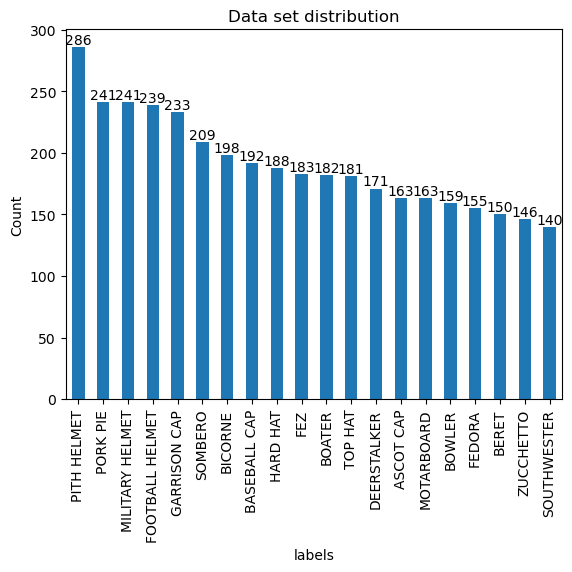

In [ ]:

headgear_df['labels'].value_counts().plot(kind='bar')

plt.title('Data set distribution')
plt.xlabel('labels')
plt.ylabel('Count')

for i in range(len(headgear_df['labels'].value_counts())):
    plt.text(i, headgear_df['labels'].value_counts()[i], headgear_df['labels'].value_counts()[i], ha='center', va='bottom')

plt.show()


### 3. Split the data into train, valid, test set
- It need to filter the data with `data set` column

In [ ]:

train_data_df = headgear_df[headgear_df["data set"] == 'train']
val_data_df = headgear_df[headgear_df["data set"] == 'valid']
test_data_df = headgear_df[headgear_df["data set"] == 'test']


### 4. Make the `image_to_tensor` function

- use `cv2.imread()` function

In [ ]:
headgear_dir = os.path.join(data_dir, 'headgear')

#### input your code in below
def image_to_tensor(data_df):
    data = []
    labels = []

    for index, row in data_df.iterrows():
        # iterrows?
        # image_path = os.path.join(headgear_df['filepaths'])
        image_path = os.path.join(headgear_dir, row['filepaths'])
        image = cv2.imread(image_path)
        data.append(image)
        labels.append(row['labels'])

    return np.array(data), np.array(labels)


In [ ]:
train_data, train_labels = image_to_tensor(train_data_df)
valid_data, valid_labels = image_to_tensor(val_data_df)
test_data, test_labels = image_to_tensor(test_data_df)

- Check the image shape

In [ ]:
print('Train Data: ', len(train_data))
print('Train Labels: ', len(train_labels))
print('Train Data Shape: ', train_data[0].shape)

Train Data:  3620
Train Labels:  3620
Train Data Shape:  (224, 224, 3)


In [ ]:
print('Valid Data: ', len(valid_data))
print('Valid Labels: ', len(valid_labels))
print('Valid Data Shape: ', valid_data[0].shape)

Valid Data:  100
Valid Labels:  100
Valid Data Shape:  (224, 224, 3)


In [ ]:
print('Test Data: ', len(test_data))
print('Test Labels: ', len(test_labels))
print('Test Data Shape: ', test_data[0].shape)

Test Data:  100
Test Labels:  100
Test Data Shape:  (224, 224, 3)
